In [ ]:
import pandas as pd

In [63]:
def deposit(d, state):
    ''' returns reward '''
    import math
    c = state['existing credits']
    s = state['existing other units']
    e = state['existing asset units']
    try:
        calculation = float(
            (math.sqrt(c**2 * d * s + e * c**2 * s ) - e * c * s) 
            / (d - e**2 * s + e))
    except ZeroDivisionError:
        calculation = 0
    return calculation

In [64]:
state = {'existing credits': 2, 'existing other units': 1, 'existing asset units': 1}

In [88]:
deposit(1, state)

0.8284271247461903

In [80]:
deposit(2, state)

0.7320508075688772

for a realistic example: if there are 100 btc in the system and btc makes up half the value of the sysetm and I want to trade .1 btc I'm basically paying a fee of:

In [93]:
1-deposit(.001, state)

0.0002498750780732806

lets see the curve

<AxesSubplot:>

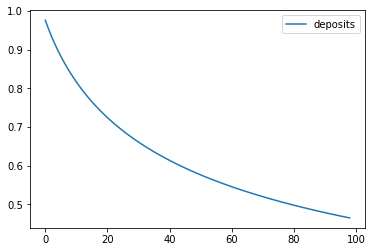

In [94]:
deposits = []
for i in range(1, 100):
    deposits.append(deposit(i/10, state))
pd.DataFrame({'deposits': deposits}).plot()

<AxesSubplot:>

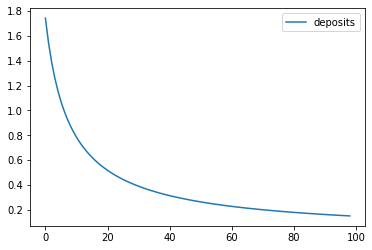

In [95]:
deposits = []
for i in range(1, 100):
    deposits.append(deposit(1, {**state, **{'existing asset units': i/10}}))
pd.DataFrame({'deposits': deposits}).plot()

<AxesSubplot:>

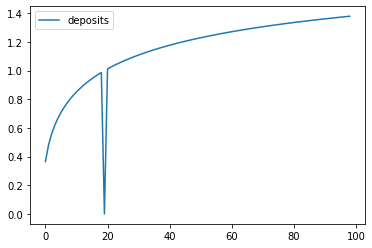

In [96]:
deposits = []
for i in range(1, 100):
    deposits.append(deposit(1, {**state, **{'existing other units': i/10}}))
pd.DataFrame({'deposits': deposits}).plot()

<AxesSubplot:>

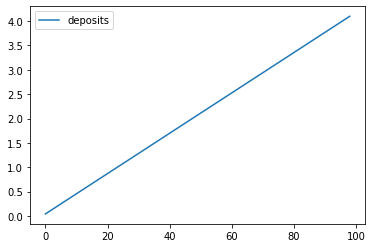

In [97]:
deposits = []
for i in range(1, 100):
    deposits.append(deposit(1, {**state, **{'existing credits': i/10}}))
pd.DataFrame({'deposits': deposits}).plot()

what if we withdraw?

In [100]:
deposit(-.1, state)

1.0263340389897238

In [104]:
deposit(-.2, state)

1.0557280900008417

<AxesSubplot:>

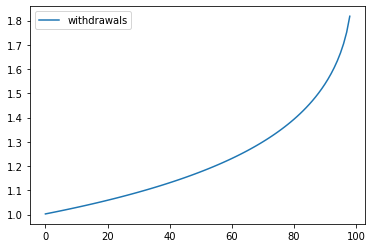

In [107]:
withdrawals = []
for i in range(1, 100):
    withdrawals.append(deposit(-1*i/100, state))
pd.DataFrame({'withdrawals': withdrawals}).plot()

In [181]:
deposit(-1, state)

2.0

In [183]:
deposit(-.9, state)

1.519493853295916

In [186]:
deposit(-.8, state)

1.3819660112501053

In [188]:
deposit(-.999, state)

1.9386931399365688

how interesting... not sure this is right... fees increase differently...

<AxesSubplot:>

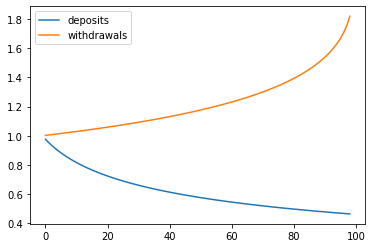

In [200]:
deposits = []
for i in range(1, 100):
    deposits.append(deposit(i/10, state))
withdrawals = []
for i in range(1, 100):
    withdrawals.append(deposit(-1*i/100, state))
pd.DataFrame({'deposits': deposits, 'withdrawals': withdrawals}).plot()

<AxesSubplot:>

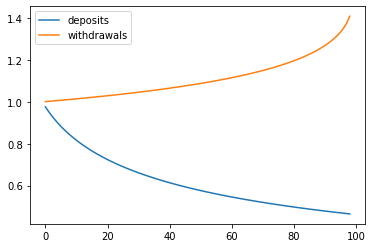

In [207]:
withdrawals = []
modifier = .5  # not sure how to come up with this... it's half of a theoretical 0 deposit
for i in range(1, 100):
    withdrawals.append(deposit(-1*i/100, state) / 2 + modifier)
pd.DataFrame({'deposits': deposits, 'withdrawals': withdrawals}).plot()

maybe we could flip it around... but how?

lets try the other formula

In [109]:
def withdraw(d, state):
    ''' returns cost '''
    import math
    c = state['existing credits']
    s = state['existing other units']
    e = state['existing asset units']
    try:
        calculation = float(
            (e * (-1*c) * s - math.sqrt(c**2 * d * s + e * c**2 * s))
            /(d - e**2 * s + e))
    except ZeroDivisionError:
        calculation = 0
    return calculation

In [131]:
withdraw(1, state)

-4.82842712474619

ok, that's garbage

In [132]:
withdraw(-.5, state)

6.82842712474619

huh?

In [151]:
withdraw(4, state)

-1.618033988749895

what is phi doing here?

<AxesSubplot:>

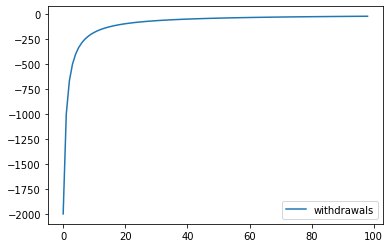

In [139]:
withdrawals = []
for i in range(1, 100):
    withdrawals.append(withdraw(i/500, state))
pd.DataFrame({'withdrawals': withdrawals}).plot()

well, that seems like it's closer to the predicted shape, but I really don't know what's going on here...

Maybe this doesn't matter. so what if people have more of an incentive to withdraw. they do anyway. people will always tend to withdraw in large numbers and deposit in small number anyway. 

so anyway, we found the formula that will always keep the system in balance, now we need to change that formula so that it can be modified by the vote.

does the vote really just come down to a factor? or two factors?

I think one cool thing about this is that the vote can modify either curve separately. if people vote to attract this asset it could just modify the deposit curve. if they vote to repell the asset it can flatten the withdrawal... if they want both...

Thats one way to think about it. another way to think about it is to say, it doesn't change the curves directly, it changes the priors that define the curve. meaning. this curve is with no priors, saying, we want to keep everything in balance. but what if we don't want to keep things in balance? then the curves change.